In [1]:
import numpy as np
import matplotlib.pyplot as plt

dimension_2D=20
n_samples=20
start=0
end=20

# Extracting the distance matrix
f1=open('Dataset1.txt','r')
l1=[]
l1=[line.split() for line in f1]
data_distance=[[] for i in range(len(l1)//20)]
i1=0
j1=0
while True:
    data_distance[i1].append(list(float(x) for x in l1[j1]))
    if((j1+1)%20==0):
        i1+=1
    if(j1==len(l1)-1):
        break
    j1+=1

# Extracting the adjency matrix with distance
f2=open('Dataset2.txt','r')
l2=[]
l2=[line.split() for line in f2]
data_network=[[] for i in range(len(l2)//20)]
i2=0
j2=0
while True:
    data_network[i2].append(list(float(x) for x in l2[j2]))
    if((j2+1)%20==0):
        i2+=1
    if(j2==len(l2)-1):
        break
    j2+=1

data_distance=np.array(data_distance)
data_network=np.array(data_network)

1/1 [==============================] - 0s 228ms/step


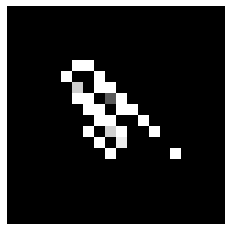

In [2]:
# example of loading the generator model and generating images
from keras.models import load_model
from numpy.random import randn
from matplotlib import pyplot

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input

# create and save a plot of generated images (reversed grayscale)
def save_plot(examples, n):
	# plot images
	for i in range(n * n):
		# define subplot
		pyplot.subplot(n, n, 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(examples[i, :, :, 0],cmap='gray')
	pyplot.show()

# load model
model = load_model('generator_model_100.h5',compile=False)
# generate images
# latent_points = generate_latent_points(400, 1)
latent_points=data_distance[3].reshape(1,400)
# generate images
X = model.predict(latent_points)
# print(latent_points)
# plot the result
save_plot(X, 1)

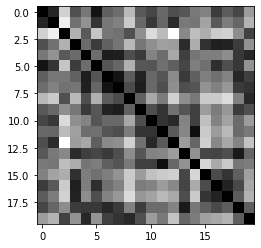

In [3]:
plt.imshow(data_distance[3],cmap='gray')

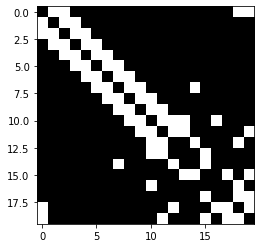

In [4]:
plt.imshow(data_network[3],cmap='gray')

In [4]:
X

array([[[[1.69824705e-01],
         [3.99833351e-01],
         [7.57609606e-01],
         [1.62901892e-03],
         [2.79727334e-04],
         [8.65555921e-05],
         [1.68321620e-07],
         [7.47218902e-16],
         [2.94094124e-11],
         [7.57678679e-15],
         [2.25973271e-15],
         [2.37385892e-12],
         [1.42337442e-09],
         [4.72345496e-10],
         [1.88143279e-09],
         [1.59415929e-08],
         [4.66385154e-06],
         [3.47090122e-07],
         [4.79593155e-06],
         [4.12675552e-04]],

        [[9.33026373e-01],
         [3.06440014e-02],
         [9.99239445e-01],
         [9.56476748e-01],
         [8.32903292e-03],
         [8.56046967e-09],
         [3.09490766e-09],
         [4.23892488e-14],
         [1.92652283e-21],
         [9.50286661e-17],
         [5.72932163e-24],
         [9.05515596e-16],
         [2.20450719e-12],
         [2.21805864e-12],
         [1.34053337e-12],
         [1.16776477e-09],
         [3.55787293e-08],

In [3]:
Y=X.reshape(1,20,20)
Y[0]

array([[2.22790703e-07, 2.47055933e-01, 4.40848671e-04, 3.39374674e-06,
        2.62575761e-09, 3.60135018e-05, 6.84369681e-08, 1.98217595e-10,
        9.35580714e-13, 3.60994719e-08, 9.02018599e-11, 2.84467935e-11,
        2.30812010e-15, 1.94094945e-08, 8.10450578e-12, 3.61337904e-11,
        3.32086348e-17, 1.37094150e-06, 3.42568036e-08, 4.04899547e-05],
       [1.84160634e-03, 4.55771559e-10, 9.99688447e-01, 3.11480403e-01,
        6.43093745e-06, 7.03117495e-11, 1.94683398e-05, 5.92814011e-08,
        2.50230808e-11, 1.67484624e-13, 4.75350592e-10, 1.04651954e-10,
        4.37553162e-12, 7.86858439e-14, 3.10516635e-09, 7.38526254e-12,
        9.22343365e-13, 3.40841922e-17, 1.63928945e-07, 6.29493225e-05],
       [2.79267617e-02, 9.94067192e-01, 8.26108184e-14, 1.00000000e+00,
        9.99999464e-01, 1.25948762e-04, 5.32132602e-11, 5.19872046e-05,
        4.28614765e-03, 9.36927706e-12, 1.09356570e-14, 1.32518807e-09,
        6.57928058e-06, 4.51028000e-11, 2.75401582e-14, 7.3093

In [4]:
# Efficient Python code for check a matrix is
# symmetric or not.

import networkx as nx

# def convert_matrix(mat, N):
#     for i in range(N):
#         for j in range(N):
#             if(mat[i][j]>=0.5):
#                 mat[i][j]=1
#             else:
#                 mat[i][j]=0
#     return mat

# Y=convert_matrix(Y[0],64)
average_apl=0
for i in range(16):
    Y=nx.from_numpy_array(Y[i])
    apl=nx.average_shortest_path_length(Y)
    acc=nx.average_clustering(Y)
    average_apl+=apl

print(apl,acc)

AttributeError: 'AtlasView' object has no attribute 'ndim'